<a href="https://colab.research.google.com/github/LuchoVidalSMN/CursoAECID/blob/main/Pr%C3%A1ctica_N%C2%B02_Visualizando_los_datos_de_radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

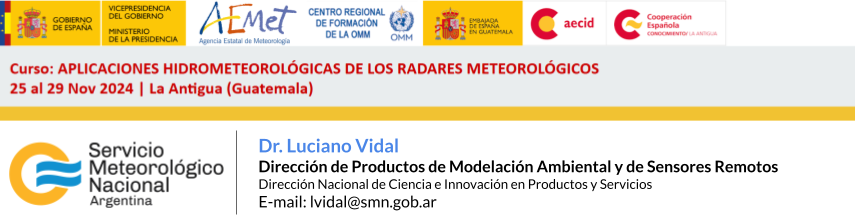

---
# **Práctica N°2:** Visualizando los datos de radar
Los radares meteorológicos están programados para realizar un barrido automático de 360° en azimut y cada escaneo sucesivo se realiza en diferentes ángulos de elevación de la antena (llamados ángulos de escaneo). Para cualquier ángulo de elevación ψ, el radar toma muestras a lo largo de la superficie de una región de aire en forma de cono como se puede apreciar en el siguiente esquema.

Cuando todos estos escaneos se combinan en un conjunto de datos, el resultado se denomina **escaneo de volumen**. El radar repite estos escaneos de volumen aproximadamente cada 5 a 10 minutos para tomar muestras del aire alrededor del radar. Por supuesto que estos tiempos dependerán de cómo se configure el radar.

Los datos de los escaneos de volumen se pueden dividir digitalmente y mostrar en la computadora de muchas formas. Las visualizaciones 2D típicas son:

* **PPI (Plan Position Indicator)**: muestra los ecos de radar alrededor de 360° de azimut, pero en un solo ángulo de elevación. Es decir, estos datos proceden de un cono que abarca muchas altitudes. Estas visualizaciones a menudo se superponen a mapas de fondo que muestran ciudades, carreteras y costas.
* **CAPPI (Constant-Altitude Plan Position Indicator)**: ofrece un corte horizontal a cualquier altitud. Estas visualizaciones también se superponen a mapas de fondo. A grandes distancias, a menudo se permite que el CAPPI siga el cono PPI desde la exploración del ángulo de elevación más bajo y se lo denomina pseudo-CAPPI.
* **RHI (Range-Height Indicator)**: es un corte vertical a lo largo de una línea de acimut Fija (denominada radial) desde el radar. Se realiza manteniendo físicamente el plato de la antena apuntando a un acimut mientras se sube y baja el ángulo de elevación. Implica mas tiempo y descagaste del radar para usos operativos.
* **Pseudo-RHI**: es un corte vertical a lo largo de una direccón (acimut) como el RHI pero usando el volumen de escaneo 360°. La ventaja que ofrece es que se usa el mismo escaneo operativo y la desventaja es la resolución vertical de los datos que es menor que en el caso de un RHI geuino.

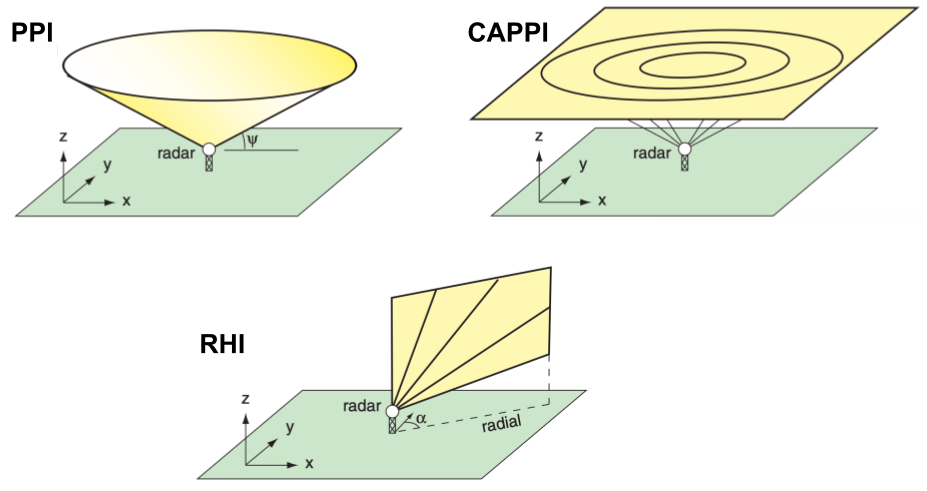

El **objetivo** entonces de esta practica es que ustedes puedan familiarizarse en como generar algunas de esas típicas visualizaciones.

## *¡Comencemos!* 💪
---

# **Instalación de librerías**
Si bien la herramienta Google Colaboratory trae un gran número de librerías preinstaladas, otras más específicas para el manejo de datos radar como [Py-ART](https://arm-doe.github.io/pyart/) no lo estan, y entonces tenemos que instalarlas. También algunas otras librerías que serán muy útiles al momento de graficar y querer agregar mapas y jugar con proyecciones como [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

In [ ]:
!pip install -qq --upgrade pip
!pip install -qq fsspec==2023.6.0
!pip install -qq pyproj
!pip install -qq netCDF4
!pip install -qq arm-pyart
!apt-get install -qq libgdal-dev libproj-dev
!pip install -qq --force-reinstall --no-binary shapely shapely==1.7.1
!pip install -qq cartopy==0.21
!pip install -qq glob2
!pip install -qq --user urllib3>=1.25
!pip install -qq wradlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 97.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2023.6.0 requires fsspec==2023.6.0,

# **Descarga de datos**
Para esta actividad solo utilizaremos un archivo con datos de radar en formato netCDF/CF-Radial. Vamos a descargar el archivo a trabajar y para ello vamos a usar el comando *wget*, que lo gaurdará en el disco local de la Google Colab (la nube!).

In [ ]:

# ARCHIVO FORMATO NETCDF/CF-RADIAL
file_nc = 'cfrad.20230911_143324.0000_to_20230911_143910.0000_RMA2_0200_01.nc'
!wget -O file.nc https://www.dropbox.com/scl/fi/aat7hc203ldmny8w5vcw6/cfrad.20230911_143324.0000_to_20230911_143910.0000_RMA2_0200_01.nc?rlkey=0zi40a6a3s04jt7oy5vied6k7&dl=0


--2023-11-22 18:56:46--  https://www.dropbox.com/scl/fi/aat7hc203ldmny8w5vcw6/cfrad.20230911_143324.0000_to_20230911_143910.0000_RMA2_0200_01.nc?rlkey=0zi40a6a3s04jt7oy5vied6k7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc52ad8a7de38d46bf322dcf3172.dl.dropboxusercontent.com/cd/0/inline/CICXY7OJb5BPJlURY7QycEw4cfv3WxQGzXZ9OyPMBOF-SanhHNhY2Pc-CYER1EKGIPkQfgAHHe-IH9O2FbrKsbUepW4_LXYAP_JArsHLuZkj5hu-3xbMXg-ST_k6zuNidsY/file# [following]
--2023-11-22 18:56:48--  https://uc52ad8a7de38d46bf322dcf3172.dl.dropboxusercontent.com/cd/0/inline/CICXY7OJb5BPJlURY7QycEw4cfv3WxQGzXZ9OyPMBOF-SanhHNhY2Pc-CYER1EKGIPkQfgAHHe-IH9O2FbrKsbUepW4_LXYAP_JArsHLuZkj5hu-3xbMXg-ST_k6zuNidsY/file
Resolving uc52ad8a7de38d46bf322dcf3172.dl.dropboxusercontent.com (uc52ad8a7de38d46bf322dcf3172.dl.dropboxusercontent.com)... 162.125.

# **Importamos las librerías**

In [ ]:

import pyart
import numpy as np
from matplotlib import pyplot as plt

import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

costas = cartopy.feature.NaturalEarthFeature(
                                             category='physical',
                                             name='coastline',
                                             scale='10m',
                                             facecolor='none'
                                            )

paises = cartopy.feature.NaturalEarthFeature(
                                             category='cultural',
                                             name='admin_0_countries',
                                             scale='10m',
                                             facecolor='none'
                                            )

prov   = cartopy.feature.NaturalEarthFeature(
                                             category='cultural',
                                             name='admin_1_states_provinces_lines',
                                             scale='10m',
                                             facecolor='none'
                                            )



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

0.3.0


# **Lectura del dato**

In [ ]:

# Creamos objeto "radar"
radar = pyart.io.read('file.nc')

# Variables disponibles
print(radar.fields.keys())

# Datos del sitio radar
radar_lat = radar.latitude['data'][0]
radar_lon = radar.longitude['data'][0]
radar_alt = radar.altitude['data'][0]

# Elevaciones disponibles (PPI)
print(radar.fixed_angle['data'].data)


dict_keys(['DBZV', 'DBZH', 'ZDR', 'KDP', 'RHOHV', 'PHIDP'])
[ 0.55  0.94  1.34  1.82  2.35  3.14  4.02  5.08  6.39  7.98 10.   12.46
 15.58 19.97 29.95]


# **Visualización PPI**

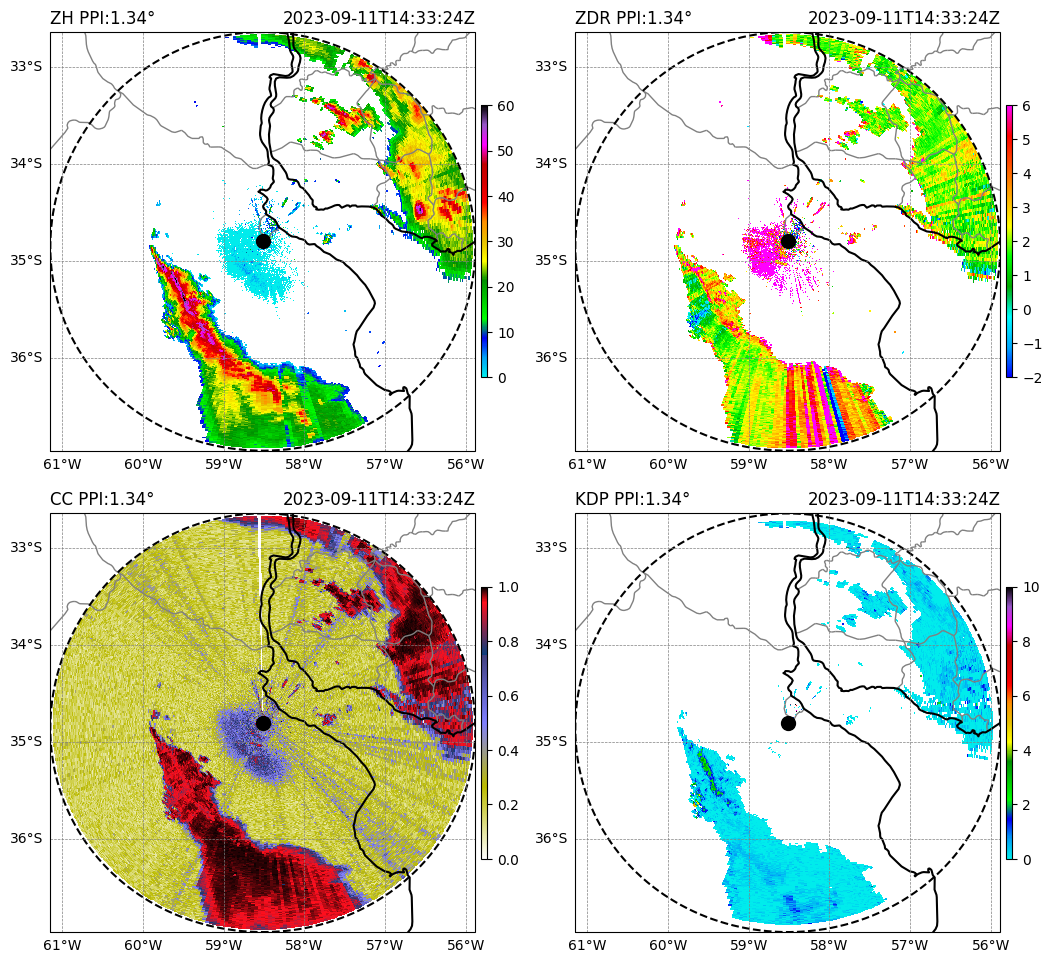

In [ ]:

#==============================================================================#

# SELECCIONAMOS PPI A GRAFICAR Y EXTRAEMOS VARIABLES
NumPPI=2 # >>> Definimos el PPI a graficar
start_index = radar.sweep_start_ray_index['data'][NumPPI]
end_index   = radar.sweep_end_ray_index['data'][NumPPI]
lats_rad = radar.gate_latitude['data'][start_index:end_index]
lons_rad = radar.gate_longitude['data'][start_index:end_index]
ZHH      = radar.fields['DBZH']['data'][start_index:end_index, :]
RHO      = radar.fields['RHOHV']['data'][start_index:end_index, :]
PHI      = radar.fields['PHIDP']['data'][start_index:end_index, :]
ZDR      = radar.fields['ZDR']['data'][start_index:end_index, :]
KDP      = radar.fields['KDP']['data'][start_index:end_index, :]

mask = np.copy(KDP)*0
mask[KDP>-30]=1
cPHI = PHI*mask
cPHI[cPHI<=0]=np.nan

#==============================================================================#

# DEFINIMOS RADIO MAXIMO DE LOS DATOS Y GENERAMOS COORDENADAS PARA LUEGO
# GRAFICAR ANILLO EN LA FIGURA.
rmax=240.0
R=12742/2 # Radio medio de la Tierra
mm=2*np.pi*R/360
alfa=np.linspace(-np.pi,np.pi,10000)
lat_rmax = np.array([])
lon_rmax = np.array([])
for line in alfa:
  tmp1 = radar_lat + (rmax/mm)*np.sin(line)
  tmp2 = radar_lon + ((rmax/mm)*np.cos(line)/np.cos(tmp1*np.pi/180))
  lat_rmax = np.append(lat_rmax, tmp1)
  lon_rmax = np.append(lon_rmax, tmp2)

#==============================================================================#

fig, ax = plt.subplots(2, 2, figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.15, bottom=0.05, right=0.85, top=0.95, wspace=1e-10, hspace=0.15)

#==============================================================================#
#==========                REFLECTIVIDAD HORIZONTAL                  ==========#
#==============================================================================#

im=ax[0][0].pcolormesh(lons_rad, lats_rad, ZHH, vmin=0, vmax=60, cmap='pyart_NWSRef')
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][0].set_title('ZH PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#
#==========                REFLECTIVIDAD DIFERENCIAL                 ==========#
#==============================================================================#

im=ax[0][1].pcolormesh(lons_rad, lats_rad, ZDR, vmin=-2, vmax=6, cmap='pyart_RefDiff')
plt.colorbar(im, ax=ax[0][1], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[0][1].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][1].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][1].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][1].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][1].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][1].set_title('ZDR PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][1].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][1].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][1].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][1].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#
#==========              COEF. DE CORRELACION CO-POLAR               ==========#
#==============================================================================#

im=ax[1][0].pcolormesh(lons_rad, lats_rad, RHO, vmin=0, vmax=1, cmap='gist_stern_r')
plt.colorbar(im, ax=ax[1][0], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[1][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[1][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[1][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[1][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[1][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[1][0].set_title('CC PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[1][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[1][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[1][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[1][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#
#==========               DIFERENCIAL DE FASE ESPECIFICA             ==========#
#==============================================================================#

im=ax[1][1].pcolormesh(lons_rad, lats_rad, KDP, vmin=0, vmax=10, cmap='pyart_NWSRef')
plt.colorbar(im, ax=ax[1][1], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[1][1].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[1][1].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[1][1].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[1][1].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[1][1].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[1][1].set_title('KDP PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[1][1].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[1][1].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[1][1].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[1][1].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#

# Guardamos la figura
#plt.savefig('ejemplo.png', transparent=False, bbox_inches='tight')

plt.show()

#==============================================================================#


# **Visualización CAPPI**

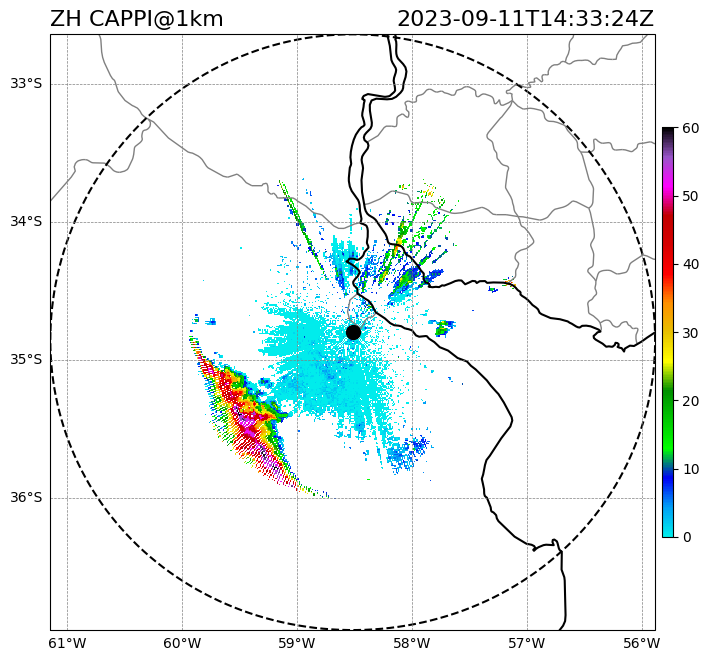

In [ ]:

# Usamos funcion de PyART
# Ver: https://arm-doe.github.io/pyart/API/generated/pyart.map.grid_from_radars.html
gatefilter = pyart.filters.GateFilter(radar)
grid = pyart.map.grid_from_radars(
                                  (radar, ),
                                  fields=['DBZH'],
                                  grid_shape=(19, 500, 500),
                                  gatefilters=(gatefilter, ),
                                  grid_limits=((1000,20000), (-240000.0, 240000), (-240000.0, 240000.0)),
                                  gridding_algo="map_gates_to_grid",
                                  map_roi=True,
                                  roi_func='dist', z_factor=0.015, xy_factor=0.010, min_radius=200.
                                 )

# Elegimos que CAPPI graficar.
# Como la reticula que armamos en la vertical va de 1 a 20km con una resolución
# de 1km, entonces el indice 0 será el CAPPI@1km, el indice 1 será el CAPPI@2km,
# y asi sucesivamente.

nCAPPI=0
CAPPI = grid.fields['DBZH']['data'][nCAPPI,:,:]
CAPPI_lon = grid.point_longitude['data'][nCAPPI,:,:]
CAPPI_lat = grid.point_latitude['data'][nCAPPI,:,:]

#==============================================================================#
# Finalmente generamos figura
#==============================================================================#

rmax=240.0
R=12742/2 # Radio medio de la Tierra
mm=2*np.pi*R/360
alfa=np.linspace(-np.pi,np.pi,10000)
lat_rmax = np.array([])
lon_rmax = np.array([])
for line in alfa:
  tmp1 = radar_lat + (rmax/mm)*np.sin(line)
  tmp2 = radar_lon + ((rmax/mm)*np.cos(line)/np.cos(tmp1*np.pi/180))
  lat_rmax = np.append(lat_rmax, tmp1)
  lon_rmax = np.append(lon_rmax, tmp2)

#==============================================================================#

fig, ax = plt.subplots(1, 1, figsize=(8,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.0001, hspace=0.0001)

im=ax[0][0].pcolormesh(CAPPI_lon, CAPPI_lat, CAPPI, vmin=0, vmax=60, cmap='pyart_NWSRef')
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=16, loc='right')
ax[0][0].set_title('ZH CAPPI@'+str(nCAPPI+1)+'km', fontsize=16, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

plt.show()

#==============================================================================#


# **Visualización Pseudo-RHI**

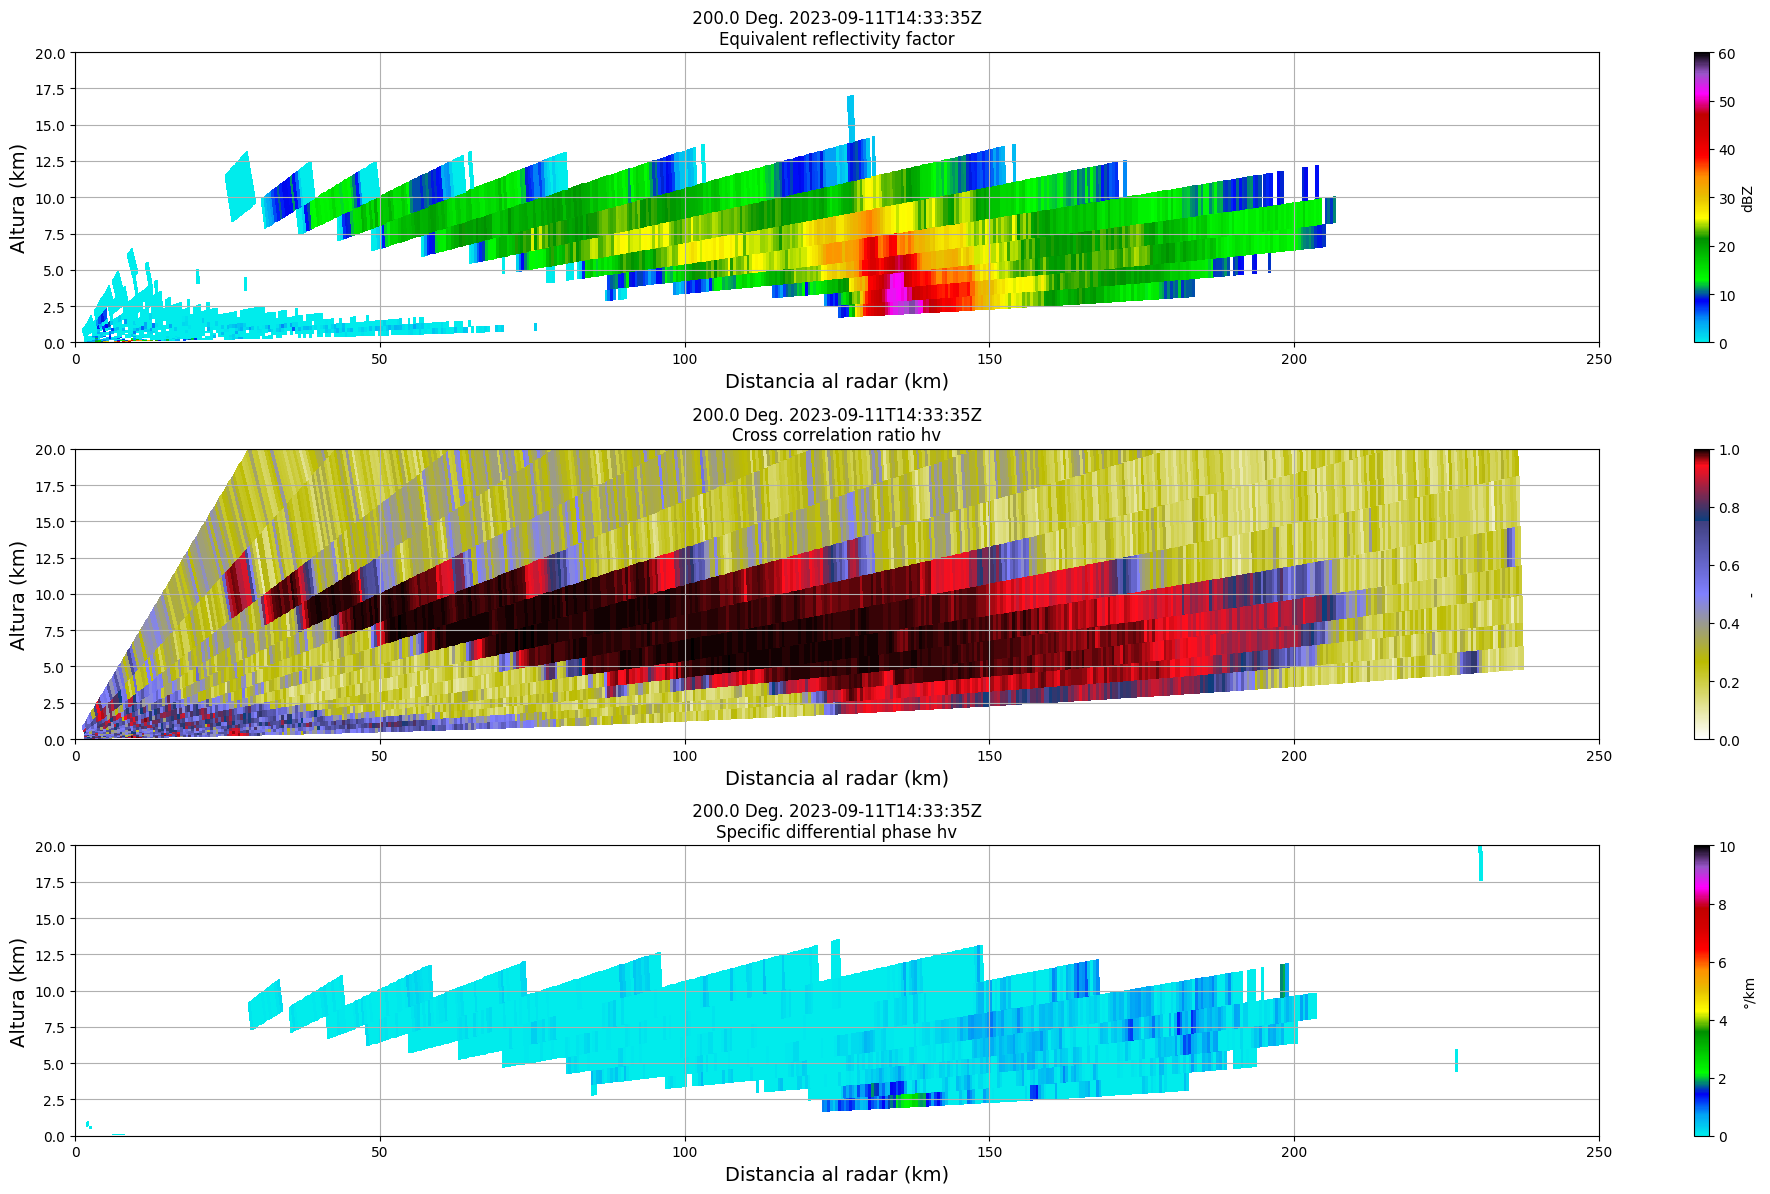

In [ ]:

# Direccion a lo largo de la cual realizar el corte vertical
radial=200

xsect = pyart.util.cross_section_ppi(radar, [radial])

display = pyart.graph.RadarDisplay(xsect)

fig = plt.figure(figsize=[20,12])

ax = fig.add_subplot(311)
display.plot('DBZH', 0, vmin=0., vmax=60., cmap='pyart_NWSRef', colorbar_label='dBZ')
display.set_limits(xlim=(0, 250), ylim=(0, 20))
plt.tight_layout()
plt.xlabel('Distancia al radar (km)',fontsize=14)
plt.ylabel('Altura (km)',fontsize=14)
plt.grid()

ax = fig.add_subplot(312)
display.plot('RHOHV', 0, vmin=0., vmax=1., cmap='gist_stern_r', colorbar_label='-')
display.set_limits(xlim=(0, 250), ylim=(0, 20))
plt.tight_layout()
plt.xlabel('Distancia al radar (km)',fontsize=14)
plt.ylabel('Altura (km)',fontsize=14)
plt.grid()

ax = fig.add_subplot(313)
display.plot('KDP', 0, vmin=0., vmax=10., cmap='pyart_NWSRef', colorbar_label='°/km')
display.set_limits(xlim=(0, 250), ylim=(0, 20))
plt.tight_layout()
plt.xlabel('Distancia al radar (km)',fontsize=14)
plt.ylabel('Altura (km)',fontsize=14)
plt.grid()

plt.show()


# **Visualización CMAX**

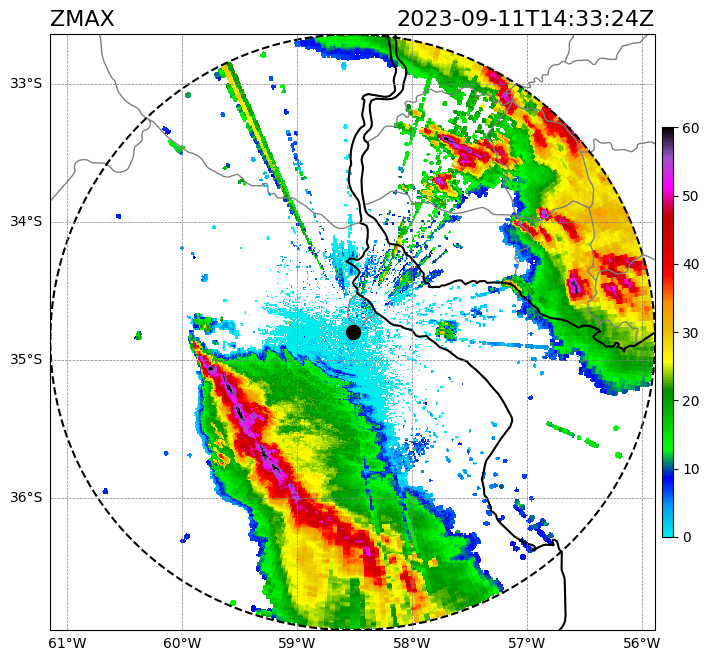

In [ ]:

#==============================================================================#

# Usamos funcion de PyART
# Ver: https://arm-doe.github.io/pyart/API/generated/pyart.map.grid_from_radars.html

gatefilter = pyart.filters.GateFilter(radar)
grid = pyart.map.grid_from_radars(
                                  (radar, ),
                                  fields=['DBZH'],
                                  grid_shape=(19, 500, 500),
                                  gatefilters=(gatefilter, ),
                                  grid_limits=((1000,20000), (-240000.0, 240000), (-240000.0, 240000.0)),
                                  gridding_algo="map_gates_to_grid",
                                  map_roi=True,
                                  roi_func='dist', z_factor=0.015, xy_factor=0.010, min_radius=200.
                                 )

# Calculamos el maximo de ZH en la columna (lo denominamos ZMAX)
ZMAX = np.max(grid.fields['DBZH']['data'], axis=0)

# Coordenadas de la reticula
grid_lon = grid.point_longitude['data'][0,:,:]
grid_lat = grid.point_latitude['data'][0,:,:]

#==============================================================================#
# Finalmente generamos figura
#==============================================================================#

rmax=240.0
R=12742/2 # Radio medio de la Tierra
mm=2*np.pi*R/360
alfa=np.linspace(-np.pi,np.pi,10000)
lat_rmax = np.array([])
lon_rmax = np.array([])
for line in alfa:
  tmp1 = radar_lat + (rmax/mm)*np.sin(line)
  tmp2 = radar_lon + ((rmax/mm)*np.cos(line)/np.cos(tmp1*np.pi/180))
  lat_rmax = np.append(lat_rmax, tmp1)
  lon_rmax = np.append(lon_rmax, tmp2)

#==============================================================================#

fig, ax = plt.subplots(1, 1, figsize=(8,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.0001, hspace=0.0001)

im=ax[0][0].pcolormesh(grid_lon, grid_lat, ZMAX, vmin=0, vmax=60, cmap='pyart_NWSRef')
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=16, loc='right')
ax[0][0].set_title('ZMAX', fontsize=16, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

plt.show()

#==============================================================================#


# **Multipaneles**
Vamos a utilizar una función de Py-ART que se llama `GridMapDisplay`.
Para mas detalles pueden consultar el siguiente link:

https://arm-doe.github.io/pyart/examples/plotting/plot_three_panel_gridmapdisplay.html#sphx-glr-examples-plotting-plot-three-panel-gridmapdisplay-py

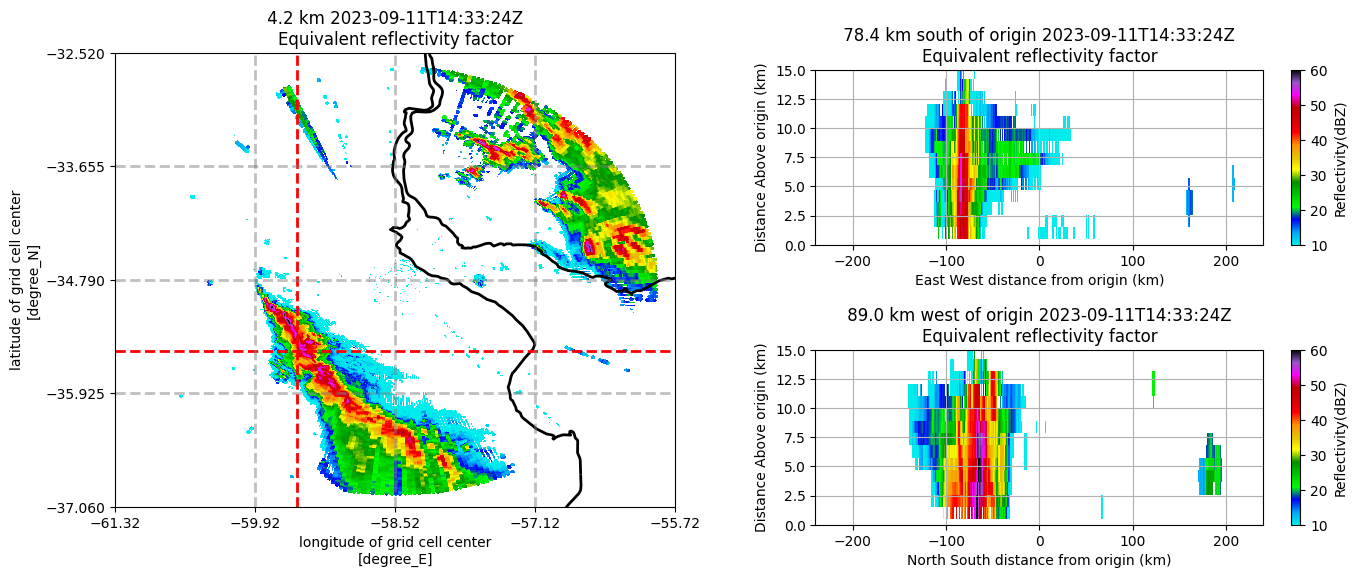

In [ ]:

#==============================================================================#

# CONSTRUIMOS RETICULA 3D ('grid')
# Usamos funcion de PyART
# Ver: https://arm-doe.github.io/pyart/API/generated/pyart.map.grid_from_radars.html
gatefilter = pyart.filters.GateFilter(radar)
grid = pyart.map.grid_from_radars(
                                  (radar, ),
                                  fields=['DBZH'],
                                  grid_shape=(19, 500, 500),
                                  gatefilters=(gatefilter, ),
                                  grid_limits=((1000,20000), (-240000.0, 240000), (-240000.0, 240000.0)),
                                  gridding_algo="map_gates_to_grid",
                                  map_roi=True,
                                  roi_func='dist', z_factor=0.015, xy_factor=0.010, min_radius=200.
                                 )

#==============================================================================#

display = pyart.graph.GridMapDisplay(grid)

projection = ccrs.PlateCarree() # --> Proyeccion

fig = plt.figure(figsize=[14,7]) # --> Tamaño de la figura

map_panel_axes = [0.05, 0.05, 0.4, 0.80]
x_cut_panel_axes = [0.55, 0.10, 0.4, 0.25]
y_cut_panel_axes = [0.55, 0.50, 0.4, 0.25]

# Parámetros
level = 3   # --> CAPPI a mostrar en la figura central
vmin = 10   # --> Limite inferior de la variable a mostrar
vmax = 60   # --> Limite superior de la variable a mostrar
lat = -35.5 # --> Latitud del corte vertical
lon = -59.5 # --> Longitud del corte vertical

# Panel 1: CAPPI
ax1 = fig.add_axes(map_panel_axes, projection=projection)
display.plot_grid(
                  'DBZH',
                  level,
                  vmin=vmin,
                  vmax=vmax,
                  ax=ax1,
                  projection=projection,
                  cmap='pyart_NWSRef',
                  colorbar_flag=False
                 )
display.plot_crosshairs(lon=lon, lat=lat)

# Panel 2: corte vertical Oeste-Este
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice(
                             'DBZH',
                             lon=lon,
                             lat=lat,
                             ax=ax2,
                             vmin=vmin,
                             vmax=vmax,
                             cmap='pyart_NWSRef'
                            )
ax2.set_ylim([0, 15])
ax2.set_xlim([-240, 240])
ax2.grid()

# Panel 3: corte vertical Sur-Norte
ax3 = fig.add_axes(y_cut_panel_axes)
display.plot_latitude_slice(
                            'DBZH',
                            lon=lon,
                            lat=lat,
                            ax=ax3,
                            vmin=vmin,
                            vmax=vmax,
                            cmap='pyart_NWSRef'
                           )
ax3.set_ylim([0, 15])
ax3.set_xlim([-240, 240])
ax3.grid()

#==============================================================================#

plt.show()
